<a href="https://colab.research.google.com/github/Adarshkumar61/Deep_Learning_using_colab/blob/main/Model_using_Transfer_Learning_with_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

#upload kaggle.json
from google.colab import files
files.upload()

!mkdir -p ~/. kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-tutorial

!kaggle -q flowers-recognition.zip -d /content/

Saving cnn_padding_ex.png to cnn_padding_ex.png
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli i

In [2]:
import pandas as pd
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Install Kaggle and set up credentials
!pip install -q kaggle

# Upload kaggle.json (from your Kaggle account)
from google.colab import files
files.upload()  # upload kaggle.json

# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Flowers dataset from Kaggle
!kaggle datasets download -d alxmamaev/flowers-recognition

# Unzip the dataset
!unzip -q flowers-recognition.zip -d /content/


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 57% 127M/225M [00:00<00:00, 1.33GB/s]
100% 225M/225M [00:00<00:00, 814MB/s] 


In [9]:
img_size = 224
batch_size = 32
datagen = ImageDataGenerator(
    rescale= 1.255,
    validation_split = 0.2,
    rotation_range = 15,
    zoom_range = 0.1,
    horizontal_flip = True
)

In [11]:
train_gen = datagen.flow_from_directory(
    '/content/flowers',
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

Found 3457 images belonging to 5 classes.


In [13]:
val_gen = datagen.flow_from_directory(
    '/content/flowers',
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 860 images belonging to 5 classes.


In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

Loading ResNet Without TOP LAYER

In [19]:
res_net = ResNet50(include_top= False, weights= 'imagenet', input_shape = (img_size, img_size, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
#freezing the resNet layers:
for layer in res_net.layers:
  layer.trainable = False

In [22]:
# Now adding custom Top Layer
x = res_net.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation= 'relu')(x)
x = Dropout(0.3)(x)
prediction = Dense(train_gen.num_classes, activation = 'softmax')(x)

In [23]:
model = Model(inputs = res_net.input, outputs = prediction)

In [25]:
model.compile(
    optimizer = Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
epochs = 10
model.fit(train_gen, epochs= epochs, validation_data= val_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 80s 603ms/step - accuracy: 0.5069 - loss: 1.4320 - val_accuracy: 0.8140 - val_loss: 0.5154
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 480ms/step - accuracy: 0.7530 - loss: 0.6958 - val_accuracy: 0.8349 - val_loss: 0.4730
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 476ms/step - accuracy: 0.7749 - loss: 0.5829 - val_accuracy: 0.8477 - val_loss: 0.4519
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 478ms/step - accuracy: 0.8011 - loss: 0.5304 - val_accuracy: 0.8337 - val_loss: 0.4476
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 477ms/step - accuracy: 0.8060 - loss: 0.5132 - val_accuracy: 0.8523 - val_loss: 0.4171
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 475ms/step - accuracy: 0.7963 - loss: 0.5553 - val_accuracy: 0.8523 - val_loss: 0.3924
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 478ms/step - accuracy: 0.8176 - loss: 0.4825 - val_accuracy: 0.8535 - val_loss: 0.3892
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 474ms/step - accuracy: 0.8426 - loss: 0

In [29]:
model.save('res_net50.h5')

In [32]:
from tensorflow.keras.models import load_model
loaded_model = load_model('res_net50.h5')

In [68]:
# prediction:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
img_path = '/content/flowers/rose/12572786553_634868f7f2_n.jpg'
img = image.load_img(img_path, target_size = (img_size, img_size))
img_array = image.img_to_array(img)
ex_img = np.expand_dims(img_array, 0)
ex_img = preprocess_input(ex_img)
pred = loaded_model(ex_img)
pred_class = np.argmax(pred[0])
class_label = list(train_gen.class_indices.keys())
print(f'predicted class: {class_label[pred_class]}')

predicted class: rose


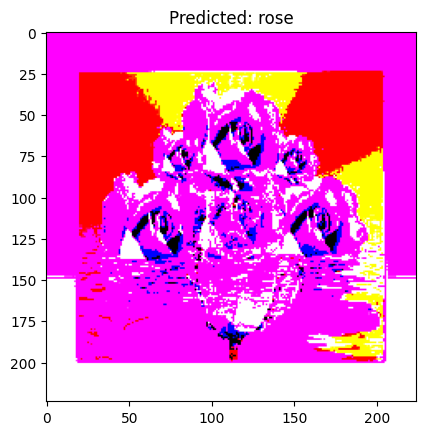

In [69]:
import matplotlib.pyplot as plt
ex_img = np.squeeze(ex_img)
plt.title(f"Predicted: {class_label[pred_class]}")
plt.imshow(ex_img)